<a href="https://colab.research.google.com/github/AhamedShimak/pytorch/blob/main/computer_vision_cnn_code_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT AND MY DEFINED FUNCTIONS

### Imports

In [57]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets


import sklearn
from sklearn.model_selection import train_test_split

###My functions

In [2]:
import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

def details_loss_curve(epochs,train_loss_track,test_loss_track):
  #loss curve
  plt.figure(figsize=(8,8))
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(epochs,train_loss_track,label="Train loss")
  plt.plot(epochs,test_loss_track,label="Test loss")
  plt.legend(prop={"size": 14})

import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});



def accu(y_pred,y_test):
  correct=torch.eq(y_pred,y_test).sum().item()
  accuracy=(correct/len(y_test))*100
  return accuracy

def details_plot_scatter(x_train, x_test, y_train, y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.BrBG, s=4, label="Training data")
  plt.scatter(x_test[:,0],x_test[:,1],c=y_test, s=60, label="Test data")
  plt.legend(prop={"size": 14});
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(x_test[:,0],x_test[:,1],c=predictions, s=20, label="Prediction")

  # Show the legend
  plt.legend(prop={"size": 14});

###GPU

In [3]:
!nvidia-smi
print(torch.cuda.is_available())
#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

Wed Apr 26 10:26:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##DATA PROCESS 


ex- tensor data-> x_train,y_train,x_test,y_test


In [15]:
# create data

train=datasets.FashionMNIST(
    root="Data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
test=datasets.FashionMNIST(
    root="Data_test",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)
#weight and bias

  #######to prevent mat multiplication error   .unsqueeze(dim=1)


100%|██████████| 26421880/26421880 [00:03<00:00, 8415442.50it/s] 


Extracting Data_test/FashionMNIST/raw/train-images-idx3-ubyte.gz to Data_test/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 145404.46it/s]


Extracting Data_test/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Data_test/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2680481.90it/s]


Extracting Data_test/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Data_test/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19470042.37it/s]

Extracting Data_test/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Data_test/FashionMNIST/raw



In [27]:
details(train.data[0])


Shape:  torch.Size([28, 28])
Dimentions:  2
###########
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12, 

In [ ]:
# create train/test split
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
for i in range(9):
  img,label=train[i]
  plt.figure(figsize=(8,8)).add_subplot(3,3,i+1)
  plt.imshow(img.squeeze())
  plt.title(labels_map[label])
  plt.axis("off")
  

In [69]:
#data_loader
torch.manual_seed(23)
train_dataloader = DataLoader(train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test, batch_size=32, shuffle=False)

len(train_dataloader),len(test_dataloader)

(1875, 313)


Shape:  torch.Size([32, 1, 28, 28])
Dimentions:  4
###########
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.1216,  ..., 0.7804, 0.4196, 0.0000],
          [0.0000, 0.0000, 0.0275,  ..., 0.3255, 0.0549, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

Text(0.5, 1.0, 'Shirt')

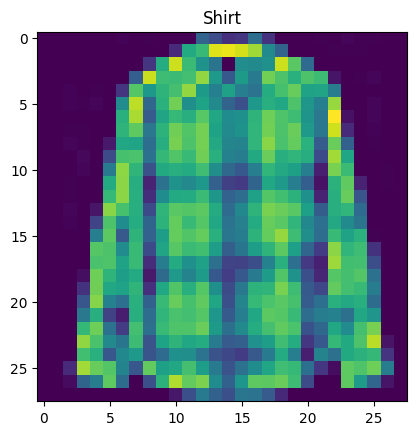

In [77]:
x_train_b_sample,y_train_b_sample=next(iter(train_dataloader))
details(x_train_b_sample),details(y_train_b_sample)

plt.imshow(x_train_b_sample[0].squeeze())
plt.title(labels_map[y_train_b_sample[0].item()])

##BUILDING THE MODEL


tips
1. torch.nn.find_suitable_loss
2. torch.nn.Paramenter
3. torch.nn.Module this is base class
4. torch.optim - optimizer

In [83]:
#flattern layer
details(x_train_b_sample)
flattern=nn.Flatten()
details(flattern(x_train_b_sample))


Shape:  torch.Size([32, 1, 28, 28])
Dimentions:  4
###########
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.1216,  ..., 0.7804, 0.4196, 0.0000],
          [0.0000, 0.0000, 0.0275,  ..., 0.3255, 0.0549, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

In [97]:
#model
class fashion_model(nn.Module):
  def __init__(self,in_,out_):
    super().__init__()
    #model_structer
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.ReLU(),
        nn.Linear(in_,512),
        nn.ReLU(),
        nn.Linear(512,128),
        nn.ReLU(),
        nn.Linear(128,32),
        nn.ReLU(),
        nn.Linear(32,out_)
    )
  def forward(self,x: torch.Tensor) -> torch.Tensor:


    return self.layer_stack(x)



#discription of model
model=fashion_model(in_=784,out_=10)
model.state_dict()

OrderedDict([('layer_stack.2.weight',
              tensor([[ 2.1769e-02,  3.4543e-02, -5.3349e-03,  ..., -4.3010e-03,
                       -5.1994e-03,  1.9498e-02],
                      [ 2.7555e-03,  1.8953e-02,  1.8364e-02,  ..., -3.4814e-02,
                        2.9839e-04, -2.0705e-03],
                      [-1.9902e-02, -1.0201e-02,  1.1757e-02,  ..., -1.8356e-02,
                       -1.1180e-02, -4.0898e-03],
                      ...,
                      [ 2.6377e-02,  3.5056e-02, -3.1157e-02,  ..., -8.6397e-03,
                       -1.2581e-02,  7.1074e-04],
                      [ 2.9415e-02, -3.3938e-02,  4.4724e-03,  ...,  2.8709e-02,
                       -2.2332e-02, -2.9270e-02],
                      [-1.6403e-02,  4.0611e-03, -1.9836e-02,  ...,  1.0308e-02,
                       -1.5280e-05,  2.9566e-02]])),
             ('layer_stack.2.bias',
              tensor([-0.0111,  0.0294, -0.0239,  0.0159,  0.0105, -0.0258,  0.0264,  0.0027,
                

In [98]:
model

fashion_model(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): ReLU()
    (2): Linear(in_features=784, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [99]:
x_train_b_sample[0].shape

torch.Size([1, 28, 28])

In [100]:
#make inference/prediction and visualize the model
with torch.inference_mode():
  pred=model(x_train_b_sample[0])

In [105]:
(torch.sigmoid(pred).squeeze())

tensor([0.4979, 0.4723, 0.4612, 0.4553, 0.5165, 0.4544, 0.4912, 0.4841, 0.4993,
        0.4648])

##CREATE OPTIMIZER / LOSS_FUNC

In [9]:
#create loss func

#optimizer



##TRAINING / TESTING LOOP

tips
0. Loop throug the data
1. set to training mode
2. Forward pass
3. Calculate the loss(pred to ground truth)
4. optimizer zer grad
5. loss backward .. back propogation
6. optimizer step - use opt and adjust parameter ... grad desent


In [10]:
#initiate trackers and hyper parameters
epoch=100
epochs=range(epoch)
train_loss_track=[]
test_loss_track=[]


#training loop

  ####testing part
 


##EVALUATION OF THE MODEL

In [11]:
#plot / matrices



##SAVING/LOADING

tips
1.  torch.save() 
2.  torch.load()
3.  toch.nn.Module.load_state_dict()